## :::🎧 Listening Time Prediction

In this notebook, I will use various Python libraries to predict Listening_Time_minutes. The process will involve analyzing the dataset, engineering relevant features, and building different machine learning models to make accurate predictions based on the input data.

> The approach I will follow includes the following steps:

* Problem Definition

* Data Exploration

* Feature Engineering

* Modeling

* Evaluation



### Problem Defination

Welcome to the 2025 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting and approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

Your Goal: Your task it to predict listening time of a podcast episode.

### Data Exploration

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Podcast Listening Time Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

>Files

* train.csv - the training dataset; Listening_Time_minutes is the target
* test.csv - the test dataset; your objective is to predict the Listening_Time_minutes for each row
* sample_submission.csv - a sample submission file in the correct format.

here is the link to the data https://www.kaggle.com/competitions/playground-series-s5e4/data

In [2]:
# I downloaded the data into my google drive so i wll mount it my drive here for access to my google drive
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [3]:
!wget https://raw.githubusercontent.com/EddiesEdit/AI-ML-Extra/refs/heads/main/helper_function.py

--2025-04-12 05:34:49--  https://raw.githubusercontent.com/EddiesEdit/AI-ML-Extra/refs/heads/main/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-04-12 05:34:49 (14.8 MB/s) - ‘helper_function.py’ saved [10247/10247]



In [4]:
from helper_function import unzip_data
import zipfile
unzip_data("/content/drive/MyDrive/Colab Notebooks/3mtt-AI ML/3mtt-AIML-MINI-PROJECT/playground-series-s5e4.zip")

In [5]:
import pandas as pd
train_df= pd.read_csv("/content/train.csv")
test_df= pd.read_csv("/content/test.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")

In [6]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [7]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [8]:
sample_submission.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


In [9]:
# impoting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula. api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Feature Engineering

Note: am going to be trying out couple of model i want to take my time during this phase.

Am going to be diving deep into my features an see if i can find out some corelation between my data before training my models.

the dataset does not come with columns description but most of the are self explanatory, so let's begin exploring the dataset....


In [10]:
train_df.columns

Index(['id', 'Podcast_Name', 'Episode_Title', 'Episode_Length_minutes',
       'Genre', 'Host_Popularity_percentage', 'Publication_Day',
       'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads',
       'Episode_Sentiment', 'Listening_Time_minutes'],
      dtype='object')

In [11]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [12]:
train_df.isna().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,87093
Genre,0
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,0
Guest_Popularity_percentage,146030
Number_of_Ads,1


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [14]:
750000-87093

662907

In [15]:
750000-146030

603970

In [16]:
train_df.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


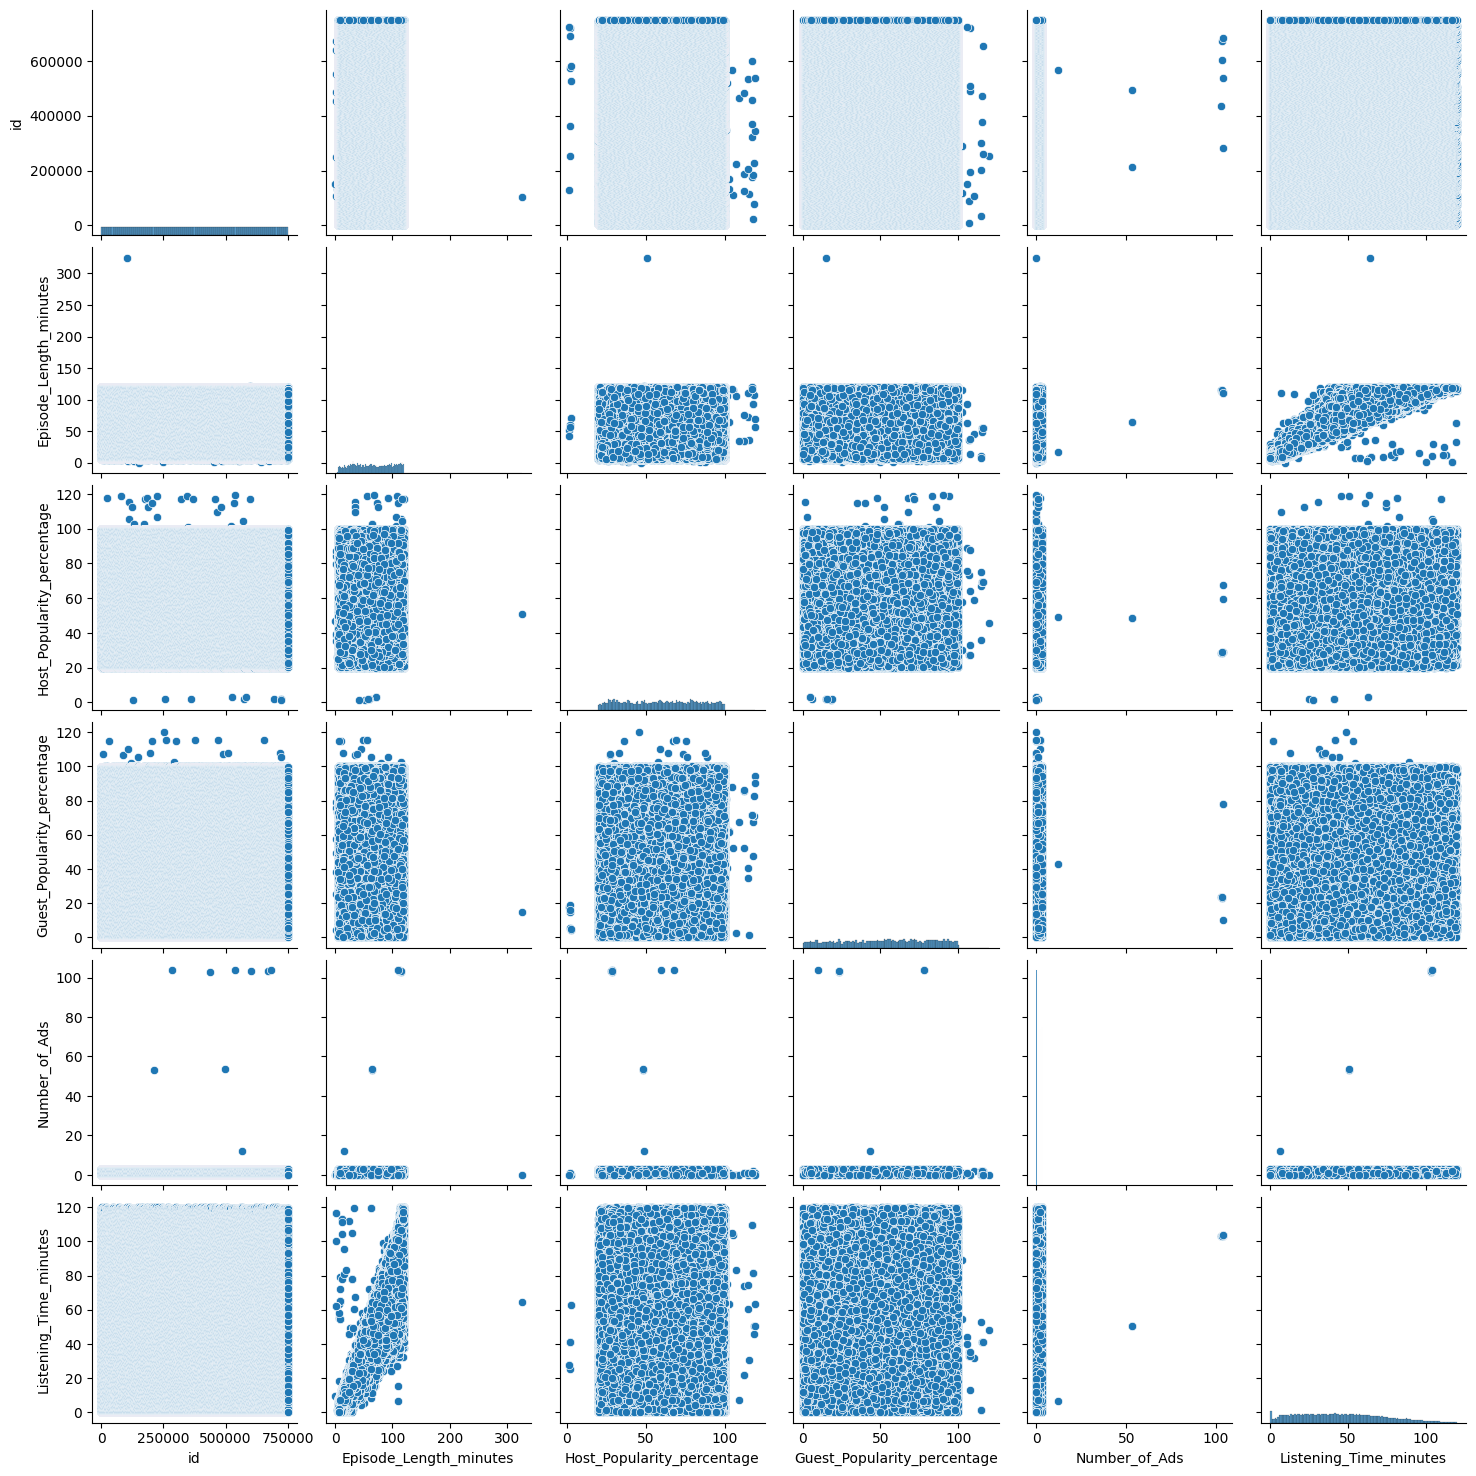

In [17]:
sns.pairplot(train_df)

In [18]:
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


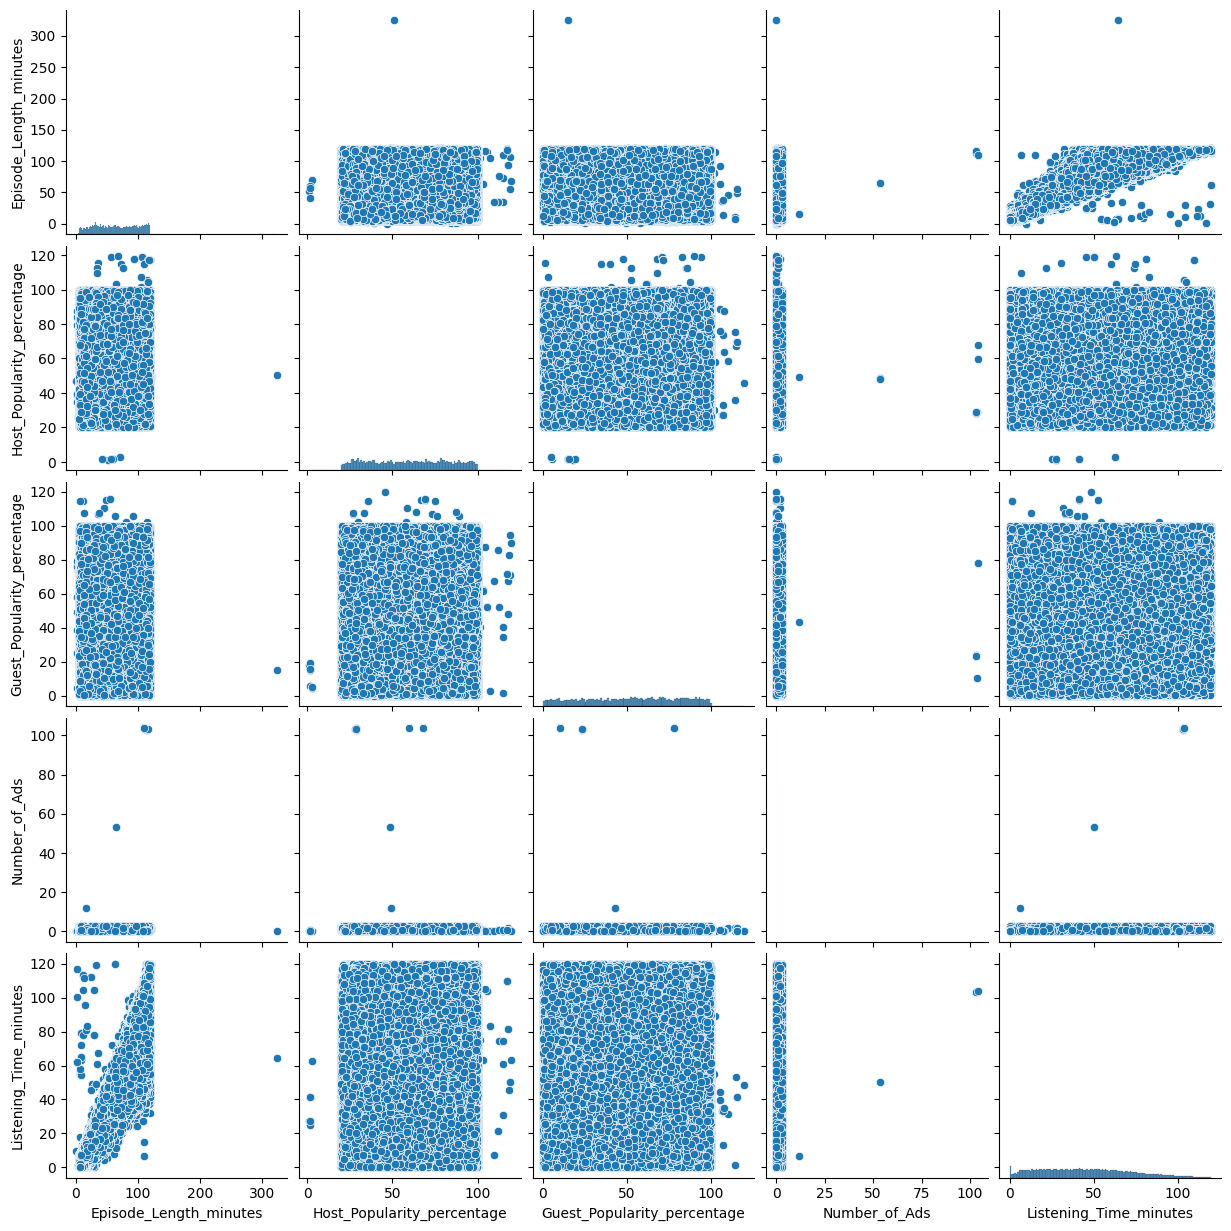

<Axes: >

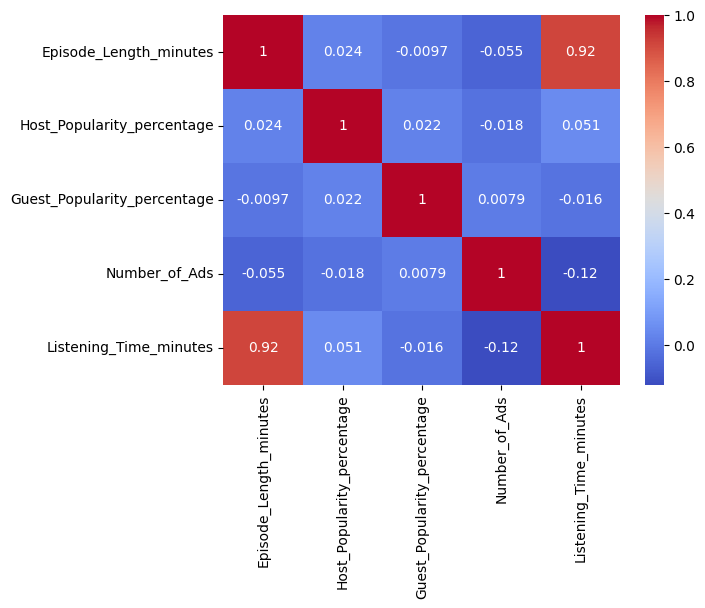

In [19]:
# Visualize correlation
numerical_features = ['Episode_Length_minutes', 'Host_Popularity_percentage',
                      'Guest_Popularity_percentage', 'Number_of_Ads']
sns.pairplot(train_df[numerical_features + ['Listening_Time_minutes']])
plt.show()

# Correlation heatmap
sns.heatmap(train_df[numerical_features + ['Listening_Time_minutes']].corr(), annot=True, cmap='coolwarm')


In [20]:
# Group by genre and average listening time
genre_group = train_df.groupby("Genre")["Listening_Time_minutes"].mean().sort_values(ascending=False)
print(genre_group)

# Encode publication day
train_df['Publication_Day_encoded'] = train_df['Publication_Day'].astype('category').cat.codes


Genre
Music         46.578394
True Crime    46.042507
Health        45.741413
Education     45.736640
Technology    45.634749
Business      45.538151
Lifestyle     45.523117
Sports        44.935722
Comedy        44.426441
News          44.406144
Name: Listening_Time_minutes, dtype: float64


In [21]:
train_df['Publication_Day_encoded']

,Publication_Day_encoded
0,4
1,2
2,5
3,1
4,1
...,...
749995,2
749996,2
749997,4
749998,4


In [22]:
train_df

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Publication_Day_encoded
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,4
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,2
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,5
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,1
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,2
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,2
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,4
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,4


In [23]:
train_df.dtypes

,0
id,int64
Podcast_Name,object
Episode_Title,object
Episode_Length_minutes,float64
Genre,object
Host_Popularity_percentage,float64
Publication_Day,object
Publication_Time,object
Guest_Popularity_percentage,float64
Number_of_Ads,float64


<Axes: xlabel='Listening_Time_minutes', ylabel='Count'>

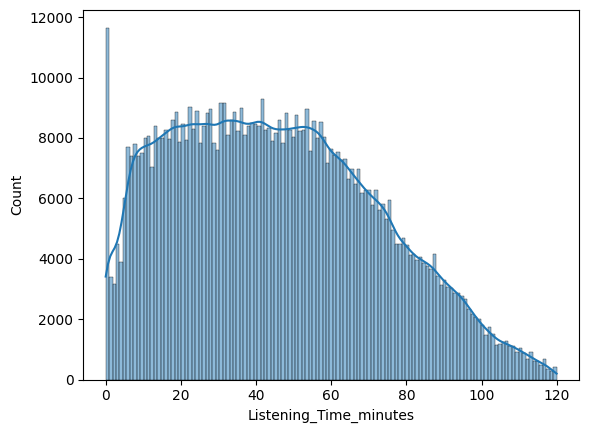

In [24]:
from sklearn.preprocessing import LabelEncoder

train_df['Episode_Sentiment_encoded'] = LabelEncoder().fit_transform(train_df['Episode_Sentiment'])
sns.histplot(train_df['Listening_Time_minutes'], kde=True)


In [25]:
train_df.dtypes

,0
id,int64
Podcast_Name,object
Episode_Title,object
Episode_Length_minutes,float64
Genre,object
Host_Popularity_percentage,float64
Publication_Day,object
Publication_Time,object
Guest_Popularity_percentage,float64
Number_of_Ads,float64


In [26]:
train_df["Publication_Day_encoded"]

,Publication_Day_encoded
0,4
1,2
2,5
3,1
4,1
...,...
749995,2
749996,2
749997,4
749998,4


In [27]:
train_df["Publication_Day"]

,Publication_Day
0,Thursday
1,Saturday
2,Tuesday
3,Monday
4,Monday
...,...
749995,Saturday
749996,Saturday
749997,Thursday
749998,Thursday


In [28]:
train_df['Podcast_Name_encoded'] = LabelEncoder().fit_transform(train_df['Podcast_Name'])
train_df['Genre_encoded'] = LabelEncoder().fit_transform(train_df['Genre'])
train_df['Episode_Title_encoded'] = LabelEncoder().fit_transform(train_df['Episode_Title'])

In [29]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Publication_Day_encoded,Episode_Sentiment_encoded,Podcast_Name_encoded,Genre_encoded,Episode_Title_encoded
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,4,2,34,9,98
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,2,0,24,1,19
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,5,0,40,2,8
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,1,2,10,8,40
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,1,1,31,3,85


<Axes: >

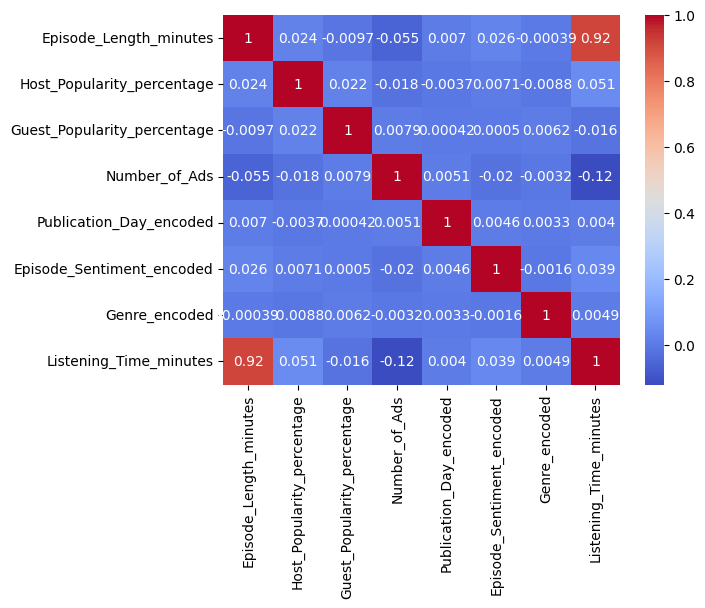

In [30]:
numerical_features = ['Episode_Length_minutes', 'Host_Popularity_percentage',
                      'Guest_Popularity_percentage', 'Number_of_Ads','Publication_Day_encoded','Episode_Sentiment_encoded','Genre_encoded']
sns.heatmap(train_df[numerical_features + ['Listening_Time_minutes']].corr(), annot=True, cmap='coolwarm')

In [31]:
test_df['Podcast_Name_encoded'] = LabelEncoder().fit_transform(test_df['Podcast_Name'])
test_df['Genre_encoded'] = LabelEncoder().fit_transform(test_df['Genre'])
test_df['Episode_Title_encoded'] = LabelEncoder().fit_transform(test_df['Episode_Title'])
test_df['Publication_Day_encoded'] = LabelEncoder().fit_transform(test_df['Publication_Day'])
test_df['Episode_Sentiment_encoded'] = LabelEncoder().fit_transform(test_df['Episode_Sentiment'])

In [32]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Podcast_Name_encoded,Genre_encoded,Episode_Title_encoded,Publication_Day_encoded,Episode_Sentiment_encoded
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,11,2,71,2,1
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral,36,5,16,3,1
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,24,1,3,0,2
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,4,1,71,3,2
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,27,4,46,6,1


In [33]:
train_data = train_df.copy()
test_data = test_df.copy()
train_data.drop(['Podcast_Name', 'Genre', 'Episode_Title', 'Publication_Day', 'Episode_Sentiment'], axis=1, inplace=True)

In [34]:
train_data.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Publication_Day_encoded,Episode_Sentiment_encoded,Podcast_Name_encoded,Genre_encoded,Episode_Title_encoded
0,0,NaN,74.81,Night,NaN,0.0,31.41998,4,2,34,9,98
1,1,119.80,66.95,Afternoon,75.95,2.0,88.01241,2,0,24,1,19
2,2,73.90,69.97,Evening,8.97,0.0,44.92531,5,0,40,2,8
3,3,67.17,57.22,Morning,78.70,2.0,46.27824,1,2,10,8,40
4,4,110.51,80.07,Afternoon,58.68,3.0,75.61031,1,1,31,3,85


In [35]:
train_data['Publication_Time_encoded'] = LabelEncoder().fit_transform(train_data['Publication_Time'])

In [36]:
train_data

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes,Publication_Day_encoded,Episode_Sentiment_encoded,Podcast_Name_encoded,Genre_encoded,Episode_Title_encoded,Publication_Time_encoded
0,0,NaN,74.81,Night,NaN,0.0,31.41998,4,2,34,9,98,3
1,1,119.80,66.95,Afternoon,75.95,2.0,88.01241,2,0,24,1,19,0
2,2,73.90,69.97,Evening,8.97,0.0,44.92531,5,0,40,2,8,1
3,3,67.17,57.22,Morning,78.70,2.0,46.27824,1,2,10,8,40,2
4,4,110.51,80.07,Afternoon,58.68,3.0,75.61031,1,1,31,3,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,75.66,69.36,Morning,NaN,0.0,56.87058,2,0,26,2,18,2
749996,749996,75.75,35.21,Night,NaN,2.0,45.46242,2,1,2,0,14,3
749997,749997,30.98,78.58,Morning,84.89,0.0,15.26000,4,0,28,4,47,2
749998,749998,108.98,45.39,Morning,93.27,0.0,100.72939,4,0,41,4,42,2


In [37]:
train_data.drop(['Publication_Time'], axis=1, inplace=True)

In [38]:
test_data.head(1)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Podcast_Name_encoded,Genre_encoded,Episode_Title_encoded,Publication_Day_encoded,Episode_Sentiment_encoded
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,11,2,71,2,1


In [39]:
test_data['Publication_Time_encoded'] = LabelEncoder().fit_transform(test_data['Publication_Time'])

In [40]:
test_data.drop(['Podcast_Name', 'Genre', 'Episode_Title', 'Publication_Day', 'Episode_Sentiment','Publication_Time'], axis=1, inplace=True)


In [41]:
test_data.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Podcast_Name_encoded,Genre_encoded,Episode_Title_encoded,Publication_Day_encoded,Episode_Sentiment_encoded,Publication_Time_encoded
0,750000,78.96,38.11,53.33,1.0,11,2,71,2,1,1
1,750001,27.87,71.29,NaN,0.0,36,5,16,3,1,2
2,750002,69.10,67.89,97.51,0.0,24,1,3,0,2,1
3,750003,115.39,23.40,51.75,2.0,4,1,71,3,2,2
4,750004,72.32,58.10,11.30,2.0,27,4,46,6,1,2


In [42]:
train_data.columns

Index(['id', 'Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads',
       'Listening_Time_minutes', 'Publication_Day_encoded',
       'Episode_Sentiment_encoded', 'Podcast_Name_encoded', 'Genre_encoded',
       'Episode_Title_encoded', 'Publication_Time_encoded'],
      dtype='object')

In [43]:
test_data.columns

Index(['id', 'Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads', 'Podcast_Name_encoded',
       'Genre_encoded', 'Episode_Title_encoded', 'Publication_Day_encoded',
       'Episode_Sentiment_encoded', 'Publication_Time_encoded'],
      dtype='object')

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Episode_Length_minutes       662907 non-null  float64
 2   Host_Popularity_percentage   750000 non-null  float64
 3   Guest_Popularity_percentage  603970 non-null  float64
 4   Number_of_Ads                749999 non-null  float64
 5   Listening_Time_minutes       750000 non-null  float64
 6   Publication_Day_encoded      750000 non-null  int8   
 7   Episode_Sentiment_encoded    750000 non-null  int64  
 8   Podcast_Name_encoded         750000 non-null  int64  
 9   Genre_encoded                750000 non-null  int64  
 10  Episode_Title_encoded        750000 non-null  int64  
 11  Publication_Time_encoded     750000 non-null  int64  
dtypes: float64(5), int64(6), int8(1)
memory usage: 63.7 MB


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Episode_Length_minutes       221264 non-null  float64
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Guest_Popularity_percentage  201168 non-null  float64
 4   Number_of_Ads                250000 non-null  float64
 5   Podcast_Name_encoded         250000 non-null  int64  
 6   Genre_encoded                250000 non-null  int64  
 7   Episode_Title_encoded        250000 non-null  int64  
 8   Publication_Day_encoded      250000 non-null  int64  
 9   Episode_Sentiment_encoded    250000 non-null  int64  
 10  Publication_Time_encoded     250000 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 21.0 MB


In [46]:
train_data.isna().sum()

,0
id,0
Episode_Length_minutes,87093
Host_Popularity_percentage,0
Guest_Popularity_percentage,146030
Number_of_Ads,1
Listening_Time_minutes,0
Publication_Day_encoded,0
Episode_Sentiment_encoded,0
Podcast_Name_encoded,0
Genre_encoded,0


In [47]:
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        train_data[label]=content.fillna(content.median())

In [48]:
test_data.isna().sum()

,0
id,0
Episode_Length_minutes,28736
Host_Popularity_percentage,0
Guest_Popularity_percentage,48832
Number_of_Ads,0
Podcast_Name_encoded,0
Genre_encoded,0
Episode_Title_encoded,0
Publication_Day_encoded,0
Episode_Sentiment_encoded,0


In [49]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        test_data[label]=content.fillna(content.median())

In [50]:
train_data.drop(['Episode_Title_encoded',"Podcast_Name_encoded"], axis=1, inplace=True)
test_data.drop(['Episode_Title_encoded',"Podcast_Name_encoded"], axis=1, inplace=True)

In [51]:
test_data.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Genre_encoded,Publication_Day_encoded,Episode_Sentiment_encoded,Publication_Time_encoded
0,750000,78.96,38.11,53.33,1.0,2,2,1,1
1,750001,27.87,71.29,53.36,0.0,5,3,1,2
2,750002,69.10,67.89,97.51,0.0,1,0,2,1
3,750003,115.39,23.40,51.75,2.0,1,3,2,2
4,750004,72.32,58.10,11.30,2.0,4,6,1,2


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Episode_Length_minutes       250000 non-null  float64
 2   Host_Popularity_percentage   250000 non-null  float64
 3   Guest_Popularity_percentage  250000 non-null  float64
 4   Number_of_Ads                250000 non-null  float64
 5   Genre_encoded                250000 non-null  int64  
 6   Publication_Day_encoded      250000 non-null  int64  
 7   Episode_Sentiment_encoded    250000 non-null  int64  
 8   Publication_Time_encoded     250000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 17.2 MB


In [53]:
from sklearn.preprocessing import StandardScaler

X =train_data.drop("Listening_Time_minutes", axis=1)
y = train_data["Listening_Time_minutes"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Publication_Day_encoded,Episode_Sentiment_encoded,Genre_encoded,Publication_Time_encoded
0,-1.732048,-0.018955,0.653611,0.042368,-1.171767,0.519288,1.228823,1.468480,1.319621
1,-1.732044,1.786382,0.309976,0.918347,0.565658,-0.482015,-1.223843,-1.231421,-1.360480
2,-1.732039,0.305593,0.442009,-1.704500,-1.171767,1.019939,-1.223843,-0.893933,-0.467113
3,-1.732035,0.088475,-0.115415,1.026033,0.565658,-0.982667,1.228823,1.130993,0.426254
4,-1.732030,1.486676,0.883576,0.242077,1.434371,-0.982667,0.002490,-0.556446,-1.360480


In [54]:
X_scaled_df.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Publication_Day_encoded,Episode_Sentiment_encoded,Genre_encoded,Publication_Time_encoded
0,-1.732048,-0.018955,0.653611,0.042368,-1.171767,0.519288,1.228823,1.468480,1.319621
1,-1.732044,1.786382,0.309976,0.918347,0.565658,-0.482015,-1.223843,-1.231421,-1.360480
2,-1.732039,0.305593,0.442009,-1.704500,-1.171767,1.019939,-1.223843,-0.893933,-0.467113
3,-1.732035,0.088475,-0.115415,1.026033,0.565658,-0.982667,1.228823,1.130993,0.426254
4,-1.732030,1.486676,0.883576,0.242077,1.434371,-0.982667,0.002490,-0.556446,-1.360480


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y, test_size=0.2, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600000, 9), (150000, 9), (600000,), (150000,))

### Modeling
I am going to try some couple of model to see which will perform best


In [57]:
# first model will be LinearRegression
LR_model = LinearRegression( )
LR_model.fit(X_train, y_train)

LinearRegression()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
LR_pred= LR_model.predict(X_test)

print("🔹 LinearRegression:")
print("MSE:", mean_squared_error(y_test, LR_pred))
print("RMSE:", root_mean_squared_error(y_test, LR_pred))
print("R² Score:", r2_score(y_test, LR_pred))

🔹 LinearRegression:
MSE: 178.2630295376858
RMSE: 13.351517873923017
R² Score: 0.7577379626291681


In [59]:
DT_model = DecisionTreeRegressor(random_state=42)
DT_model.fit(X_train, y_train)
DT_pred = DT_model.predict(X_test)

print("🔹 Decision Tree:")
print("MSE:", mean_squared_error(y_test, DT_pred))
print("RMSE", root_mean_squared_error(y_test, DT_pred))
print("R² Score:", r2_score(y_test, DT_pred))

🔹 Decision Tree:
MSE: 333.25045382500366
RMSE 18.25514869358789
R² Score: 0.5471078096912289


In [60]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("🔹 K-Nearest Neighbors:")
print("MSE:", mean_squared_error(y_test, knn_pred,))
print("RMSE", root_mean_squared_error(y_test, knn_pred))
print("R² Score:", r2_score(y_test, knn_pred))

🔹 K-Nearest Neighbors:
MSE: 217.73901787684903
RMSE 14.755982443634482
R² Score: 0.7040895230897117


In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

print("🔹 Gradient Boosting:")
print("MSE:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", root_mean_squared_error(y_test, gbr_pred))
print("R² Score:", r2_score(y_test, gbr_pred))


🔹 Gradient Boosting:
MSE: 172.40443860572168
RMSE: 13.130287072479478
R² Score: 0.7656998725045967


so after series of experiment with different model i will pick model for forther experiment: Gradient Boosting and LinearRegression

In [ ]:
from sklearn.model_selection import GridSearchCV
# Step 1: Define your model
gbr = GradientBoostingRegressor()

# Step 2: Create a K-Fold object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 10-fold CV

# Step 3: Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Step 4: Create GridSearchCV with KFold cross-validation
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=kfold,              # Use KFold here
                           n_jobs=-1)

# Step 5: Fit the model
grid_search.fit(X_train, y_train)

# Step 6: Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Step 7: Use best model for predictions
best_gbr = grid_search.best_estimator_
gbr_pred = best_gbr.predict(X_test)

print("🔹 Gradient Boosting:")
print("MSE:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", root_mean_squared_error(y_test, gbr_pred))
print("R² Score:", r2_score(y_test, gbr_pred))

KeyboardInterrupt: 

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function for RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1️⃣ Define the model
gbr = GradientBoostingRegressor(random_state=42)

# 2️⃣ Define K-Fold cross-validation strategy
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# 3️⃣ Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# 4️⃣ Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 5️⃣ Fit model to training data
grid_search.fit(X_train, y_train)

# 6️⃣ Best parameters and model
print("✅ Best Parameters Found:", grid_search.best_params_)
print("✅ Best CV Score (Negative MSE):", grid_search.best_score_)

# 7️⃣ Evaluate on test data
best_gbr = grid_search.best_estimator_
gbr_pred = best_gbr.predict(X_test)

# 8️⃣ Final Evaluation Metrics
print("\n🔍 Final Model Evaluation on Test Set:")
print(f"MSE: {mean_squared_error(y_test, gbr_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, gbr_pred):.2f}")
print(f"R² Score: {r2_score(y_test, gbr_pred):.4f}")


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
